# Setting up

In [ ]:
!pip install pyproject.toml-based projects

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement pyproject.toml-based (from versions: none)
ERROR: No matching distribution found for pyproject.toml-based


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab\ Notebooks/Emotion-Detection-From-Tweets-Using-BERT-and-SVM-Ensemble-Model-master

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/Emotion-Detection-From-Tweets-Using-BERT-and-SVM-Ensemble-Model-master'
/content


In [ ]:
!pip install -qq sentencepiece
!pip install -qq transformers
!pip install -qq unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 98.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 119.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 14.3 MB/s eta 0:00:00


In [ ]:
!gdown --id -qq 1up7d8aWd0H-QDN2konB_4oAwa4oHJQr2
!gdown --id -qq 141nsJ-dt-ZDR0aM1GkY2CGEmKeIM7O1F
!gdown --id 1mUoiYzyUs6ihlmkqskdPPgo0O1ainWqw
!unzip -qq wassa_dataset.zip -y
!rm wassa_dataset.zip

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1mUoiYzyUs6ihlmkqskdPPgo0O1ainWqw
To: /content/codes.json
100% 216k/216k [00:00<00:00, 169MB/s]
caution: filename not matched:  -y


In [ ]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
import torch.utils
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import pickle
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from nltk.tokenize import TweetTokenizer
from sklearn.metrics import accuracy_score
import re
import unidecode
from nltk import PorterStemmer, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from transformers import MT5Tokenizer
from transformers import RobertaTokenizer, RobertaModel, BertTokenizer, BertModel, AlbertModel, AlbertTokenizer, AutoModel, AutoTokenizer
import pandas as pd
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 16})
plt.rc('font', family='serif')

In [ ]:
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

KeyboardInterrupt: ignored

# Loading the dataset

In [ ]:
plt.rc('font', family='serif')

In [ ]:
df_train = pd.read_csv("wassa_train.csv")
df_val = pd.read_csv("wassa_val.csv")
df_test = pd.read_csv("wassa_test.csv")

n_samples = df_train[["tweet", "emotion"]].groupby("emotion").count()
df_union = pd.concat([df_test, df_train, df_val])
sns.histplot(df_union['emotion'], shrink=0.8)
plt.xlabel('Emotion')
plt.title('Distribution of emotions')

print(n_samples)

In [ ]:
emotions_list=["joy", "anger", "fear", "sadness", "neutral"]

In [ ]:
texts_train = df_train.tweet.tolist()
texts_val = df_val.tweet.tolist()
texts_test = df_test.tweet.tolist()

label_encoder = LabelEncoder()
emotions_train = label_encoder.fit_transform(df_train.emotion.tolist())
emotions_val = label_encoder.transform(df_val.emotion.tolist())
emotions_test = label_encoder.transform(df_test.emotion.tolist())

#Preprocessing the dataset

In [ ]:
def preprocess_text(text_list):
  for i, text in enumerate(text_list):
    # eliminate URLs
    result = re.result = re.sub(r"http\S+", "", text)
    # eliminate email addresses
    result = re.sub('\S*@\S*\s?', '', result)
    text_list[i] = result

In [ ]:
preprocess_text(texts_train)
preprocess_text(texts_val)
preprocess_text(texts_test)

# Useful functions

In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(columns=['acc', 'precision'])


In [ ]:
def pickle_object(object, location):
    filehandler = open(location, "wb")
    pickle.dump(object, filehandler)
    filehandler.close()

def pickle_load_object(location):
    file = open(location, 'rb')
    object = pickle.load(file)
    file.close()
    return object

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    cmap='Purples'
    if cmap is None:
        cmap = plt.get_cmap('Purples')

    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(12, 8))
    im = plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    im = plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

def compute_metrics(y_true, predictions, name):
  average = "macro"
  acc = accuracy_score(y_true, predictions)
  precision = precision_score(y_true, predictions, average=average)
  recall = recall_score(y_true, predictions, average=average)
  f1 = f1_score(y_true, predictions, average=average)
  df = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1_score'])
  df.loc[len(df.index)] = [acc, precision, recall, f1]
  df.index = [name]
  return df


# Model and tokenizer selection functions





In [ ]:
def get_model(model_name):
  model = None
  if model_name == 'bert-base-cased':
      model = BertModel.from_pretrained(model_name)
  if model_name == 'bert-large-cased':
      model = BertModel.from_pretrained(model_name)
  if model_name == 'roberta-base':
      model = RobertaModel.from_pretrained(model_name)
  if model_name == 'roberta-large':
      model = RobertaModel.from_pretrained(model_name)

  if model_name == 'vinai/bertweet-base':
      model = AutoModel.from_pretrained(model_name)
  if model_name == 'vinai/bertweet-large':
      model = AutoModel.from_pretrained(model_name)

  return model

def get_tokenizer(model_name):
    tokenizer = None
    if model_name == 'bert-base-cased':
      tokenizer = BertTokenizer.from_pretrained(model_name)
    if model_name == 'bert-large-cased':
      tokenizer = BertTokenizer.from_pretrained(model_name)

    if model_name == 'roberta-base':
      tokenizer = RobertaTokenizer.from_pretrained(model_name)
    if model_name == 'roberta-large':
      tokenizer = RobertaTokenizer.from_pretrained(model_name)

    if model_name == 'vinai/bertweet-base':
      tokenizer = AutoTokenizer.from_pretrained(model_name, normalization=True, use_fast=False)
    if model_name == 'vinai/bertweet-large':
      tokenizer = AutoTokenizer.from_pretrained(model_name, normalization=True, use_fast=False)

    return tokenizer

# Choosing the device and model

In [ ]:
!pip3 install emoji==0.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49720 sha256=ae5d687aef07efbda0376dc5743be33eeee50b3d9f292142f6f9af0a3987a6a4
  Stored in directory: /root/.cache/pip/wheels/1b/bd/d9/310c33c45a553798a714e27e3b8395d37128425442b8c78e07
Successfully built emoji


In [ ]:
# this colab supports training for bert-base-cased roberta-base vinai/bertweet-base models
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'
tokenizer = get_tokenizer(PRE_TRAINED_MODEL_NAME)
if tokenizer is None:
  print("Wrong model! Choose another one.")

In [ ]:
epoch_dict = {"bert-base-cased" : 5, "roberta-base":5, "vinai/bertweet-base":5}
maxlen_dict = {"bert-base-cased" : 85, "roberta-base":170, "vinai/bertweet-base":90}

In [ ]:
EPOCHS = epoch_dict[PRE_TRAINED_MODEL_NAME]
BATCH_SIZE = 32 # higher batch size might aid in the latter stages of fine tuning
maxlen = maxlen_dict[PRE_TRAINED_MODEL_NAME]
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

# Building the PyTorch datasets and dataloaders

In [ ]:
class WassaDataset(Dataset):

  def __init__(self, texts, emotions, tokenizer, max_len):
    self.texts = texts
    self.emotions = emotions
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.texts)

  def __getitem__(self, item):
    text = str(self.texts[item])
    emotion = self.emotions[item]
    encoding = self.tokenizer.encode_plus(
      text,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      padding='max_length',
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'text': text,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'emotions': torch.tensor(emotion, dtype=torch.long)
    }

In [ ]:
def create_data_loader(texts, emotions, tokenizer, max_len, batch_size):
  dataset = WassaDataset(
    texts=texts,
    emotions=emotions,
    tokenizer=tokenizer,
    max_len=max_len)

  return DataLoader(
    dataset,
    batch_size=batch_size,
    num_workers=2
  )

In [ ]:
train_data_loader = create_data_loader(texts_train, emotions_train, tokenizer, maxlen, BATCH_SIZE)
val_data_loader = create_data_loader(texts_val, emotions_val, tokenizer, maxlen, BATCH_SIZE)
test_data_loader = create_data_loader(texts_test, emotions_test, tokenizer, maxlen, BATCH_SIZE)

# Building the model

In [ ]:
class EmotionsClassifier(nn.Module):
  def __init__(self, n_classes, model_name):
    super(EmotionsClassifier, self).__init__()
    self.bert = get_model(model_name)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
    self.softmax = nn.LogSoftmax(dim=1)

  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask,
      return_dict=False
    )
    output = self.drop(pooled_output)
    output = self.out(output)
    return self.softmax(output)

In [ ]:
model = EmotionsClassifier(len(emotions_list), PRE_TRAINED_MODEL_NAME)
model.to(device)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


EmotionsClassifier(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwis

In [ ]:

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.NLLLoss().to(device)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
EPOCHS

5

# Training and validation

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
device

'cuda'

In [ ]:
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler, n_examples):
  model = model.train()
  losses = []
  correct_predictions = 0
  for d in tqdm(data_loader):
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    emotions = d["emotions"].to(device)
    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, emotions)
    correct_predictions += torch.sum(preds == emotions)
    losses.append(loss.item())
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, torch.mean(torch.tensor(losses))

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()
  losses = []
  correct_predictions = 0
  preds = []

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      emotions = d["emotions"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      loss = loss_fn(outputs, emotions)
      correct_predictions += torch.sum(preds == emotions)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, torch.mean(torch.tensor(losses))

In [ ]:
import pandas as pd

In [ ]:
!ls

Bert.ipynb	      codes.json     models_anal.png  SVM_wassa.ipynb
Bert_wassa.ipynb      dataset.zip    README.md	      wassa_test.csv
best_model_state.bin  emoticons.csv  SVM.ipynb	      wassa_train.csv
checkpoints	      LICENSE	     svm_model.obj    wassa_val.csv


In [ ]:
%%time
def train(model, train_data_loader, val_data_loader, loss_fn, optimizer, device, scheduler, model_name):
    history = defaultdict(list)
    best_accuracy = 0
    best_model = None
    df = pd.DataFrame(columns=['train_acc', 'train_loss', 'val_acc', 'val_loss'])
    for epoch in range(EPOCHS):
        print(f'Epoch {epoch + 1}/{EPOCHS}')
        print('-' * 10)
        train_acc, train_loss = train_epoch(
            model,
            train_data_loader,
            loss_fn,
            optimizer,
            device,
            scheduler,
            len(texts_train)
        )

        print(f'Training loss {train_loss} accuracy {train_acc}')

        val_acc, val_loss = eval_model(
            model,
            val_data_loader,
            loss_fn,
            device,
            len(texts_val)
        )

        print(f'Validation loss {val_loss} accuracy {val_acc}')
        print()

        df.loc[len(df.index)] = [train_acc.cpu(), train_loss.cpu(), val_acc.cpu(), val_loss.cpu()]

        if val_acc > best_accuracy:
            torch.save(model.state_dict(), f'checkpoints/{model_name}.bin')
            best_accuracy = val_acc

    return df, best_accuracy

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs


## Исследуем влияние размера батча

In [ ]:
batch_sizes = [8, 16, 32, 64]
batch_info = []
best_accs = []
for batch_size in batch_sizes:
    model = EmotionsClassifier(len(emotions_list), PRE_TRAINED_MODEL_NAME)
    model.to(device)
    train_data_loader = create_data_loader(texts_train, emotions_train, tokenizer, maxlen, batch_size)
    val_data_loader = create_data_loader(texts_val, emotions_val, tokenizer, maxlen, batch_size)
    test_data_loader = create_data_loader(texts_test, emotions_test, tokenizer, maxlen, batch_size)
    optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
    total_steps = len(train_data_loader) * EPOCHS
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=0,
        num_training_steps=total_steps
    )

    loss_fn = nn.NLLLoss()
    info, best_acc = train(model, train_data_loader, val_data_loader, loss_fn, optimizer, device, scheduler)
    batch_info.append(info)
    best_accs.append(best_acc)

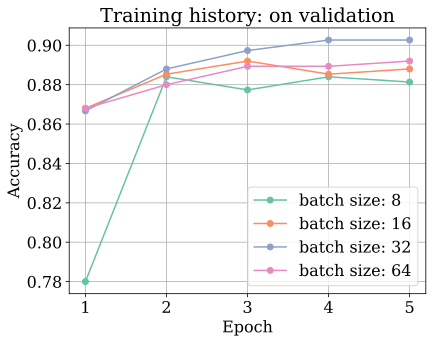

In [ ]:
palette = sns.color_palette('Set2')
for idx, info in enumerate(batch_info):
    plt.plot(info['val_acc'], c=palette[idx], label=f'batch size: {batch_sizes[idx]}', marker='o')
    plt.title('Training history: on validation')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.xticks(ticks = np.arange(0, EPOCHS), labels=np.arange(1, EPOCHS + 1))
    plt.legend()
    plt.grid(True)
plt.savefig("batch_size_anal",
           bbox_inches ="tight")

plt.show()

In [ ]:
best_accs

[tensor(0.8840, device='cuda:0', dtype=torch.float64),
 tensor(0.8920, device='cuda:0', dtype=torch.float64),
 tensor(0.9027, device='cuda:0', dtype=torch.float64),
 tensor(0.8920, device='cuda:0', dtype=torch.float64)]

In [ ]:
BATCH_SIZE

32

## Подбираем lr

In [ ]:
train_data_loader = create_data_loader(texts_train, emotions_train, tokenizer, maxlen, BATCH_SIZE)
val_data_loader = create_data_loader(texts_val, emotions_val, tokenizer, maxlen, BATCH_SIZE)
test_data_loader = create_data_loader(texts_test, emotions_test, tokenizer, maxlen, BATCH_SIZE)
lrs = list(np.logspace(-6, -5, 3)) + [2e-5, 1e-4, 1e-3]
lrs_info = []
best_accs = []
for lr in lrs:
    model = EmotionsClassifier(len(emotions_list), PRE_TRAINED_MODEL_NAME)
    model.to(device)
    optimizer = AdamW(model.parameters(), lr=lr, correct_bias=False)
    total_steps = len(train_data_loader) * EPOCHS
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=0,
        num_training_steps=total_steps
    )

    loss_fn = nn.NLLLoss()
    info, best_acc = train(model, train_data_loader, val_data_loader, loss_fn, optimizer, device, scheduler)
    lrs_info.append(info)
    best_accs.append(best_acc)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1/5
----------


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 1.6067352294921875 accuracy 0.24166666666666667
Validation loss 1.5142704248428345 accuracy 0.39999999999999997

Epoch 2/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 1.467252254486084 accuracy 0.373
Validation loss 1.3672385215759277 accuracy 0.4746666666666666

Epoch 3/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 1.3421905040740967 accuracy 0.45199999999999996
Validation loss 1.2783637046813965 accuracy 0.504

Epoch 4/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 1.2633527517318726 accuracy 0.4993333333333333
Validation loss 1.230218529701233 accuracy 0.5439999999999999

Epoch 5/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 1.2473574876785278 accuracy 0.5021666666666667
Validation loss 1.2171378135681152 accuracy 0.5479999999999999



Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1/5
----------


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 1.380857229232788 accuracy 0.41566666666666663
Validation loss 1.0166012048721313 accuracy 0.64

Epoch 2/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.8473523855209351 accuracy 0.7158333333333333
Validation loss 0.6981034278869629 accuracy 0.7826666666666666

Epoch 3/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.5990284085273743 accuracy 0.825
Validation loss 0.5988339185714722 accuracy 0.8066666666666666

Epoch 4/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.4938429296016693 accuracy 0.8584999999999999
Validation loss 0.569335401058197 accuracy 0.82

Epoch 5/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.45550715923309326 accuracy 0.8736666666666666
Validation loss 0.5582693219184875 accuracy 0.824



Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1/5
----------


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.8911895155906677 accuracy 0.6558333333333333
Validation loss 0.46184393763542175 accuracy 0.86

Epoch 2/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.3140784800052643 accuracy 0.9061666666666667
Validation loss 0.42821136116981506 accuracy 0.8733333333333333

Epoch 3/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.18605875968933105 accuracy 0.9481666666666666
Validation loss 0.45226308703422546 accuracy 0.876

Epoch 4/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.12927524745464325 accuracy 0.965
Validation loss 0.45554423332214355 accuracy 0.8813333333333333

Epoch 5/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.09993688762187958 accuracy 0.9731666666666666
Validation loss 0.4689403474330902 accuracy 0.8693333333333333



Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1/5
----------


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.7820044755935669 accuracy 0.7076666666666667
Validation loss 0.44898688793182373 accuracy 0.8546666666666667

Epoch 2/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.2823352813720703 accuracy 0.9166666666666666
Validation loss 0.4416581094264984 accuracy 0.8813333333333333

Epoch 3/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.1486954391002655 accuracy 0.9573333333333333
Validation loss 0.4672214090824127 accuracy 0.876

Epoch 4/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.08279677480459213 accuracy 0.9781666666666666
Validation loss 0.499603271484375 accuracy 0.8746666666666666

Epoch 5/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.05024830996990204 accuracy 0.9863333333333333
Validation loss 0.5046069025993347 accuracy 0.88



Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1/5
----------


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 1.6655242443084717 accuracy 0.20983333333333332
Validation loss 1.6239628791809082 accuracy 0.19999999999999998

Epoch 2/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 1.6403062343597412 accuracy 0.21333333333333332
Validation loss 1.6463819742202759 accuracy 0.19999999999999998

Epoch 3/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 1.5593087673187256 accuracy 0.27199999999999996
Validation loss 1.5362650156021118 accuracy 0.2866666666666667

Epoch 4/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 1.5235376358032227 accuracy 0.29833333333333334
Validation loss 1.5417289733886719 accuracy 0.2853333333333333

Epoch 5/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 1.5176538228988647 accuracy 0.30516666666666664
Validation loss 1.5292081832885742 accuracy 0.32



Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1/5
----------


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 1.872080683708191 accuracy 0.19783333333333333
Validation loss 1.7725067138671875 accuracy 0.19999999999999998

Epoch 2/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 1.753542423248291 accuracy 0.20116666666666666
Validation loss 1.7479091882705688 accuracy 0.19999999999999998

Epoch 3/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 1.715214490890503 accuracy 0.19583333333333333
Validation loss 1.6227201223373413 accuracy 0.19999999999999998

Epoch 4/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 1.6864162683486938 accuracy 0.19799999999999998
Validation loss 1.6148780584335327 accuracy 0.19999999999999998

Epoch 5/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 1.665675401687622 accuracy 0.19616666666666666
Validation loss 1.6114282608032227 accuracy 0.19999999999999998



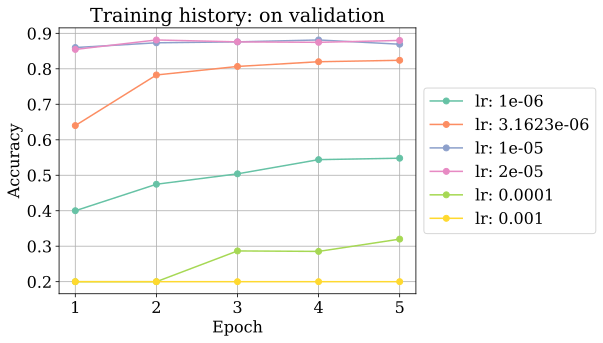

In [ ]:
palette = sns.color_palette('Set2')
labels = [1e-06, 3.1623e-06, 1e-05, 2e-05, 1e-04, 1e-3]
for idx, info in enumerate(lrs_info):
    plt.plot(info['val_acc'], c=palette[idx], label=f'lr: {labels[idx]}', marker='o')
    plt.title('Training history: on validation')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.xticks(ticks = np.arange(0, EPOCHS), labels=np.arange(1, EPOCHS + 1))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
plt.savefig("lrs_anal",
            bbox_inches ="tight")

plt.show()

## Перебираем разные модели

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# this colab supports training for bert-base-cased roberta-base vinai/bertweet-base models
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'
tokenizer = get_tokenizer(PRE_TRAINED_MODEL_NAME)
if tokenizer is None:
  print("Wrong model! Choose another one.")

In [ ]:
epoch_dict = {"bert-base-cased" : 5, "bert-large-cased" : 7,
              "roberta-base":5, "roberta-large":7,
              "vinai/bertweet-base":5, "vinai/bertweet-large":7}
maxlen_dict = {"bert-base-cased" : 85, "bert-large-cased" : 85,
               "roberta-base":170, "roberta-large":170,
               "vinai/bertweet-base":90, "vinai/bertweet-large":170}

In [ ]:
EPOCHS = epoch_dict[PRE_TRAINED_MODEL_NAME]
BATCH_SIZE = 32 # higher batch size might aid in the latter stages of fine tuning
maxlen = maxlen_dict[PRE_TRAINED_MODEL_NAME]
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

In [ ]:
a = get_tokenizer('bert-large-cased')
print(a)

BertTokenizer(name_or_path='bert-large-cased', vocab_size=28996, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)


In [ ]:
maxlen_dict

{'bert-base-cased': 85,
 'bert-large-cased': 85,
 'roberta-base': 170,
 'roberta-large': 170,
 'vinai/bertweet-base': 90,
 'vinai/bertweet-large': 170}

In [ ]:
pd.concat(models_info)
best_accs

NameError: ignored

In [ ]:
import gc
gc.collect()

In [ ]:
#import pickle
#with open('models_info.pkl', 'wb') as outf:
#    pickle.dump(models_info, outf, pickle.HIGHEST_PROTOCOL)
pd.concat(models_info)

,train_acc,train_loss,val_acc,val_loss
0,"tensor(0.6760, dtype=torch.float64)",tensor(0.8508),"tensor(0.8413, dtype=torch.float64)",tensor(0.4921)
1,"tensor(0.8857, dtype=torch.float64)",tensor(0.3691),"tensor(0.8787, dtype=torch.float64)",tensor(0.4082)
2,"tensor(0.9287, dtype=torch.float64)",tensor(0.2354),"tensor(0.8773, dtype=torch.float64)",tensor(0.4424)
3,"tensor(0.9515, dtype=torch.float64)",tensor(0.1593),"tensor(0.8840, dtype=torch.float64)",tensor(0.4997)
4,"tensor(0.9657, dtype=torch.float64)",tensor(0.1236),"tensor(0.8813, dtype=torch.float64)",tensor(0.4828)
0,"tensor(0.6112, dtype=torch.float64)",tensor(0.9708),"tensor(0.8293, dtype=torch.float64)",tensor(0.5312)
1,"tensor(0.8780, dtype=torch.float64)",tensor(0.3997),"tensor(0.8693, dtype=torch.float64)",tensor(0.4430)
2,"tensor(0.9122, dtype=torch.float64)",tensor(0.2873),"tensor(0.8680, dtype=torch.float64)",tensor(0.4425)
3,"tensor(0.9372, dtype=torch.float64)",tensor(0.2103),"tensor(0.8773, dtype=torch.float64)",tensor(0.4533)
4,"tensor(0.9492, dtype=torch.float64)",tensor(0.1686),"tensor(0.8880, dtype=torch.float64)",tensor(0.4592)


In [ ]:
model_names = ["roberta-base", 'roberta-large',
                'bert-base-cased', 'bert-large-cased',
               "vinai/bertweet-base", "vinai/bertweet-large"]
#models_info = []
#best_accs = []
labels = [r'RoBERTa_{base}', r'RoBERTa_{large}',
    r'BERT_{base}', r'BERT_{large}',
          r'BERTweet_{base}', r'BERTweet_{large}']
lrs = [2e-5, 5e-6, 2e-5, 5e-6, 2e-5, 5e-6]

for idx, model_name in enumerate(model_names[-2:], 4):
    print(model_name)
    EPOCHS = epoch_dict[model_name]
    tokenizer = get_tokenizer(model_name)
    maxlen = maxlen_dict[model_name]
    if tokenizer is None:
        raise ValueError("Wrong model! Choose another one.")
    train_data_loader = create_data_loader(texts_train, emotions_train, tokenizer, maxlen, BATCH_SIZE)
    val_data_loader = create_data_loader(texts_val, emotions_val, tokenizer, maxlen, BATCH_SIZE)
    test_data_loader = create_data_loader(texts_test, emotions_test, tokenizer, maxlen, BATCH_SIZE)


    model = EmotionsClassifier(len(emotions_list), model_name)
    model.to(device)
    optimizer = AdamW(model.parameters(), lr=lrs[idx], correct_bias=False)
    total_steps = len(train_data_loader) * EPOCHS
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=0,
        num_training_steps=total_steps
    )

    loss_fn = nn.NLLLoss()
    info, best_acc = train(model, train_data_loader, val_data_loader, loss_fn, optimizer, device, scheduler, labels[idx])
    models_info.append(info)
    best_accs.append(best_acc)

vinai/bertweet-base


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of the model checkpoint at vinai/bertweet-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Epoch 1/5
----------


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.8098965883255005 accuracy 0.7043333333333333
Validation loss 0.4330184757709503 accuracy 0.868

Epoch 2/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.3005973696708679 accuracy 0.9103333333333333
Validation loss 0.3950328528881073 accuracy 0.8813333333333333

Epoch 3/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.16907162964344025 accuracy 0.9525
Validation loss 0.4137493669986725 accuracy 0.8893333333333333

Epoch 4/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.10042618960142136 accuracy 0.9733333333333333
Validation loss 0.4258427321910858 accuracy 0.8986666666666666

Epoch 5/5
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.07323617488145828 accuracy 0.9813333333333333
Validation loss 0.44402649998664856 accuracy 0.8973333333333333

vinai/bertweet-large


Some weights of the model checkpoint at vinai/bertweet-large were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.decoder.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at vinai/bertweet-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use 

Epoch 1/7
----------


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 1.2906391620635986 accuracy 0.4403333333333333
Validation loss 0.6178181767463684 accuracy 0.7933333333333333

Epoch 2/7
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.4551852345466614 accuracy 0.8534999999999999
Validation loss 0.40603819489479065 accuracy 0.8693333333333333

Epoch 3/7
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.26860353350639343 accuracy 0.9169999999999999
Validation loss 0.38317179679870605 accuracy 0.8853333333333333

Epoch 4/7
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.1743171215057373 accuracy 0.9463333333333332
Validation loss 0.3982088565826416 accuracy 0.8826666666666666

Epoch 5/7
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.13163426518440247 accuracy 0.9613333333333333
Validation loss 0.38212624192237854 accuracy 0.8933333333333333

Epoch 6/7
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.09977582842111588 accuracy 0.9716666666666667
Validation loss 0.40076062083244324 accuracy 0.892

Epoch 7/7
----------


  0%|          | 0/188 [00:00<?, ?it/s]

Training loss 0.07722361385822296 accuracy 0.9778333333333333
Validation loss 0.4148111045360565 accuracy 0.892



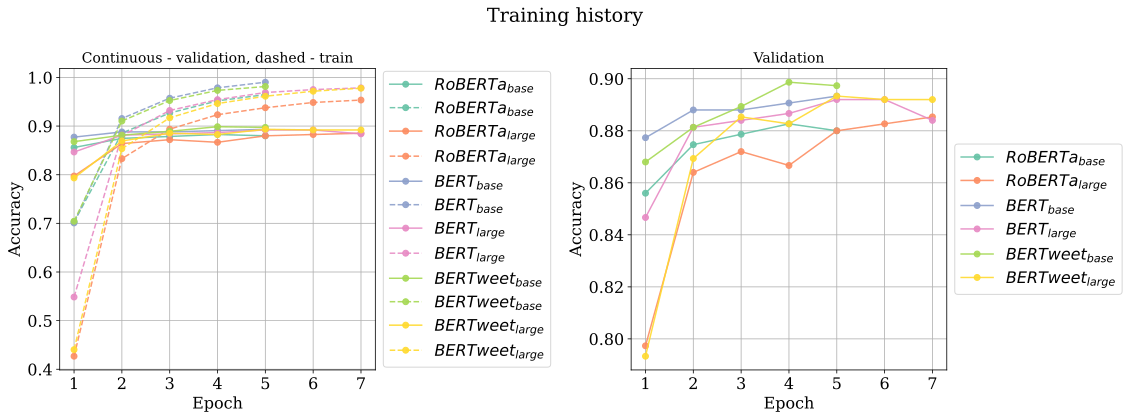

In [ ]:
palette = sns.color_palette('Set2')
labels = [r'$RoBERTa_{base}$', r'$RoBERTa_{large}$',
    r'$BERT_{base}$', r'$BERT_{large}$',
          r'$BERTweet_{base}$', r'$BERTweet_{large}$']
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
for idx, info in enumerate(models_info):
    axs[0].plot(info['val_acc'], c=palette[idx], label=f'{labels[idx]}', marker='o', alpha=0.9)
    axs[0].plot(info['train_acc'], c=palette[idx], label=f'{labels[idx]}', marker='o', linestyle='--', alpha=0.9)
    axs[0].set_title('Continuous - validation, dashed - train', fontsize=14)
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(ticks = np.arange(0, EPOCHS), labels=np.arange(1, EPOCHS + 1))
    axs[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axs[0].grid(True)
for idx, info in enumerate(models_info):
    axs[1].plot(info['val_acc'], c=palette[idx], label=f'{labels[idx]}', marker='o', alpha=0.9)
    axs[1].set_title('Validation', fontsize=14)
    axs[1].set_ylabel('Accuracy')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(ticks = np.arange(0, EPOCHS), labels=np.arange(1, EPOCHS + 1))
    axs[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    axs[1].grid(True)
fig.suptitle('Training history')
fig.tight_layout()
plt.savefig("models_anal",
            bbox_inches ="tight")

plt.show()

In [ ]:
dlist(zip(labels, best_accs))

[('$RoBERTa_{base}$', tensor(0.8827, device='cuda:0', dtype=torch.float64)),
 ('$RoBERTa_{large}$', tensor(0.8853, device='cuda:0', dtype=torch.float64)),
 ('$BERT_{base}$', tensor(0.8933, device='cuda:0', dtype=torch.float64)),
 ('$BERT_{large}$', tensor(0.8920, device='cuda:0', dtype=torch.float64)),
 ('$BERTweet_{base}$', tensor(0.8987, device='cuda:0', dtype=torch.float64)),
 ('$BERTweet_{large}$', tensor(0.8933, device='cuda:0', dtype=torch.float64))]

In [ ]:
len(emotions_list)

5

In [ ]:
PRE_TRAINED_MODEL_NAME


'bert-base-cased'

In [ ]:
train_data_loader = create_data_loader(texts_train, emotions_train, tokenizer, maxlen, BATCH_SIZE)
val_data_loader = create_data_loader(texts_val, emotions_val, tokenizer, maxlen, BATCH_SIZE)
test_data_loader = create_data_loader(texts_test, emotions_test, tokenizer, maxlen, BATCH_SIZE)

# Plotting training history

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams.update({'font.size': 16})
plt.rc('font', family='serif')

In [ ]:
for name, v_list in history.items():
    buf = []
    for v in v_list:
        buf.append(v.cpu())
    history[name] = buf

NameError: ignored

In [ ]:
palette = sns.color_palette('Set2')
plt.figsize=(10, 5)
plt.plot(history['train_acc'], label='train', c=palette[0])
plt.plot(history['val_acc'], label='validation', c=palette[3])
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(ticks = np.arange(0, EPOCHS), labels=np.arange(1, EPOCHS + 1))
plt.legend()
plt.grid()

In [ ]:
best_accuracy

# BERT_model Class





In [ ]:
class Bert_model:
  def __init__(self, model, encoder, tokenizer, maxlen):
    self._model = model
    self._encoder = encoder
    self._tokenizer = tokenizer
    self._device = "cpu"
    self._maxlen = maxlen

  def set_device(self, device):
    self._device = device
    self._model.to(device)

  def _preprocess_text(self, text):
      # eliminate URLs
      result = re.result = re.sub(r"http\S+", "", text)
      # eliminate email addresses
      result = re.sub('\S*@\S*\s?', '', result)
      return result

  def _make_prediction_for_text(self, text):
    text = self._preprocess_text(text)
    encoding = self._tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=self._maxlen,
        return_token_type_ids=False,
        padding='max_length',
        return_attention_mask=True,
        return_tensors='pt'
    )

    input_ids = encoding['input_ids'].to(self._device)
    attention_mask = encoding['attention_mask'].to(self._device)
    outputs = self._model(
        input_ids=input_ids,
        attention_mask=attention_mask
    )
    outputs.to(self._device)
    return outputs.cpu().detach().numpy()

  def detect_emotions_with_labels(self, texts):
    predicted_emotions = []
    for text in texts:
      emotion = self._make_prediction_for_text(text)
      pred = np.argmax(emotion, axis=1)
      prediction = self._encoder.inverse_transform(pred)
      predicted_emotions.append(prediction[0])
    return predicted_emotions

  def detect_emotions_with_proba(self, texts):
    predicted_emotions = []
    for text in texts:
      emotion_proba = self._make_prediction_for_text(text)
      predicted_emotions.append(emotion_proba)
    return np.concatenate(predicted_emotions)

In [ ]:
model_names = ["roberta-base", 'roberta-large',
                'bert-base-cased', 'bert-large-cased',
               "vinai/bertweet-base", "vinai/bertweet-large"]

labels = [r'RoBERTa_{base}', r'RoBERTa_{large}',
    r'BERT_{base}', r'BERT_{large}',
          r'BERTweet_{base}', r'BERTweet_{large}']
model_names = dict(list(zip(labels, model_names)))

In [ ]:
def get_model_metrics(model_name, texts, emotions):
    PATH = ('/content/drive/MyDrive/Colab Notebooks/Emotion-Detection-From-Tweets-Using-BERT-and-SVM-Ensemble-Model-master/checkpoints/' +
            model_name + '.bin')
    model = EmotionsClassifier(len(emotions_list), model_names[model_name])
    model.load_state_dict(torch.load(PATH))
    model.eval()
    tokenizer = get_tokenizer(model_names[model_name])
    maxlen = maxlen_dict[model_names[model_name]]
    bert_model = Bert_model(model, label_encoder, tokenizer, maxlen)
    bert_model.set_device("cuda")
    bert_predictions = bert_model.detect_emotions_with_labels(texts)
    y_true = label_encoder.inverse_transform(emotions)
    return compute_metrics(y_true, bert_predictions, model_name)

,accuracy,precision,recall,f1_score
RoBERTa_{base},0.888000,0.888794,0.888000,0.887917
RoBERTa_{large},0.874667,0.875076,0.874667,0.874731


In [ ]:
model_metrics_list = []
for model_name in model_names:
    df =  get_model_metrics(model_name, texts_val, emotions_val)
    model_metrics_list.append(df)
    print(df)
pd.concat(model_metrics_list)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


                accuracy  precision    recall  f1_score
RoBERTa_{base}  0.882667   0.883397  0.882667  0.882924


Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


                 accuracy  precision    recall  f1_score
RoBERTa_{large}  0.885333   0.886052  0.885333  0.885501


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


             accuracy  precision    recall  f1_score
BERT_{base}  0.893333   0.896788  0.893333   0.89403


Some weights of the model checkpoint at bert-large-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


              accuracy  precision  recall  f1_score
BERT_{large}     0.892     0.8923   0.892   0.89212


Some weights of the model checkpoint at vinai/bertweet-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.decoder.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


                 accuracy  precision    recall  f1_score
BERTweet_{base}  0.898667   0.900356  0.898667  0.899167


Some weights of the model checkpoint at vinai/bertweet-large were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.decoder.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at vinai/bertweet-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use 

                  accuracy  precision    recall  f1_score
BERTweet_{large}  0.893333   0.895393  0.893333  0.893907


,accuracy,precision,recall,f1_score
RoBERTa_{base},0.882667,0.883397,0.882667,0.882924
RoBERTa_{large},0.885333,0.886052,0.885333,0.885501
BERT_{base},0.893333,0.896788,0.893333,0.894030
BERT_{large},0.892000,0.892300,0.892000,0.892120
BERTweet_{base},0.898667,0.900356,0.898667,0.899167
BERTweet_{large},0.893333,0.895393,0.893333,0.893907


In [ ]:
model_metrics_list = []
for model_name in model_names:
    df =  get_model_metrics(model_name, texts_test, emotions_test)
    model_metrics_list.append(df)
    print(df)
pd.concat(model_metrics_list)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


                accuracy  precision  recall  f1_score
RoBERTa_{base}     0.888   0.888794   0.888  0.887917


Some weights of the model checkpoint at roberta-large were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


                 accuracy  precision    recall  f1_score
RoBERTa_{large}  0.874667   0.875076  0.874667  0.874731


Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


             accuracy  precision    recall  f1_score
BERT_{base}  0.870667   0.870169  0.870667  0.870296


Some weights of the model checkpoint at bert-large-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


              accuracy  precision  recall  f1_score
BERT_{large}     0.872    0.87217   0.872  0.871635


Some weights of the model checkpoint at vinai/bertweet-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.decoder.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


                 accuracy  precision  recall  f1_score
BERTweet_{base}      0.88   0.880673    0.88  0.879865


Some weights of the model checkpoint at vinai/bertweet-large were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.decoder.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at vinai/bertweet-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use 

                  accuracy  precision    recall  f1_score
BERTweet_{large}  0.889333   0.889652  0.889333  0.889161


,accuracy,precision,recall,f1_score
RoBERTa_{base},0.888000,0.888794,0.888000,0.887917
RoBERTa_{large},0.874667,0.875076,0.874667,0.874731
BERT_{base},0.870667,0.870169,0.870667,0.870296
BERT_{large},0.872000,0.872170,0.872000,0.871635
BERTweet_{base},0.880000,0.880673,0.880000,0.879865
BERTweet_{large},0.889333,0.889652,0.889333,0.889161


## Bert model validation

In [ ]:
model_names

## Bert model testing

In [ ]:
model_name= 'BERTweet_{base}'
PATH = ('/content/drive/MyDrive/Colab Notebooks/Emotion-Detection-From-Tweets-Using-BERT-and-SVM-Ensemble-Model-master/checkpoints/' +
            model_name + '.bin')
model = EmotionsClassifier(len(emotions_list), model_names[model_name])
model.load_state_dict(torch.load(PATH))
model.eval()
tokenizer = get_tokenizer(model_names[model_name])
maxlen = maxlen_dict[model_names[model_name]]
bert_model = Bert_model(model, label_encoder, tokenizer, maxlen)
bert_model.set_device("cuda")
bert_predictions = bert_model.detect_emotions_with_labels(texts_test)
y_true = label_encoder.inverse_transform(emotions_test)

Some weights of the model checkpoint at vinai/bertweet-base were not used when initializing RobertaModel: ['lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias', 'lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.decoder.bias', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
bert_predictions = bert_model.detect_emotions_with_labels(texts_test)
y_true = label_encoder.inverse_transform(emotions_test)
compute_metrics(y_true, bert_predictions, PRE_TRAINED_MODEL_NAME)

,accuracy,precision,recall,f1_score
bert-base-cased,0.88,0.880673,0.88,0.879865


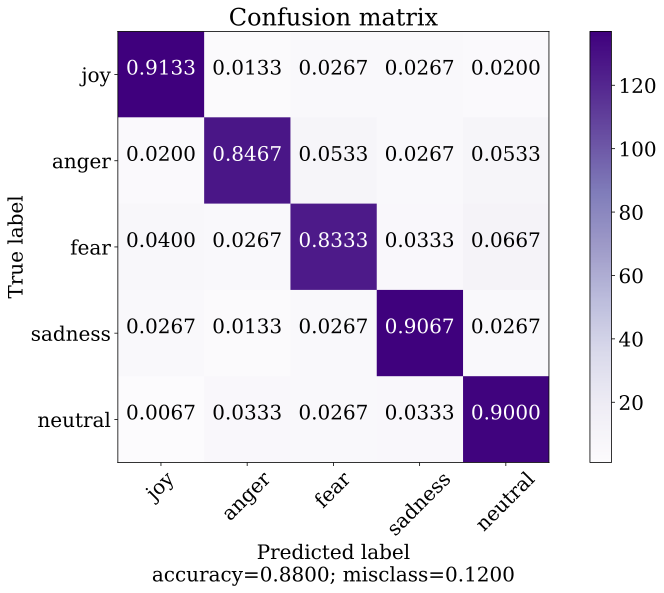

In [ ]:
cm = confusion_matrix(y_true, bert_predictions, labels=emotions_list)
plot_confusion_matrix(cm, emotions_list)

In [ ]:
print(classification_report(y_true, bert_predictions))